In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
ticker = "NVDA"
end = dt.datetime(2025, 8,28)
start = end - dt.timedelta(days = 3 *365) 
start, end

(datetime.datetime(2022, 8, 29, 0, 0), datetime.datetime(2025, 8, 28, 0, 0))

In [4]:
df = yf.download(ticker, start = start, end = end)
df

/var/folders/8t/02rqhjs137jgdrdtzbwlhwn40000gn/T/ipykernel_43323/299304866.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start = start, end = end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2022-08-29,15.778239,16.314465,15.744289,15.996925,496132000
2022-08-30,15.445721,16.015897,15.160132,15.937012,530181000
2022-08-31,15.072259,15.517617,14.937453,15.361841,573710000
2022-09-01,13.916924,14.359286,13.250885,14.188532,1178865000
2022-09-02,13.627342,14.150587,13.571422,14.079690,743157000
...,...,...,...,...,...
2025-08-21,174.979996,176.899994,173.809998,174.850006,140040900
2025-08-22,177.990005,178.589996,171.199997,172.610001,172789400


In [5]:
df.columns
df.tail

<bound method NDFrame.tail of Price            Close        High         Low        Open      Volume
Ticker            NVDA        NVDA        NVDA        NVDA        NVDA
Date                                                                  
2022-08-29   15.778239   16.314465   15.744289   15.996925   496132000
2022-08-30   15.445721   16.015897   15.160132   15.937012   530181000
2022-08-31   15.072259   15.517617   14.937453   15.361841   573710000
2022-09-01   13.916924   14.359286   13.250885   14.188532  1178865000
2022-09-02   13.627342   14.150587   13.571422   14.079690   743157000
...                ...         ...         ...         ...         ...
2025-08-21  174.979996  176.899994  173.809998  174.850006   140040900
2025-08-22  177.990005  178.589996  171.199997  172.610001   172789400
2025-08-25  179.809998  181.910004  176.570007  178.350006   163012800
2025-08-26  181.770004  182.389999  178.809998  180.059998   168688200
2025-08-27  181.600006  182.490005  179.100006 

/var/folders/8t/02rqhjs137jgdrdtzbwlhwn40000gn/T/ipykernel_43323/4263264095.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
/var/folders/8t/02rqhjs137jgdrdtzbwlhwn40000gn/T/ipykernel_43323/4263264095.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
/var/folders/8t/02rqhjs1

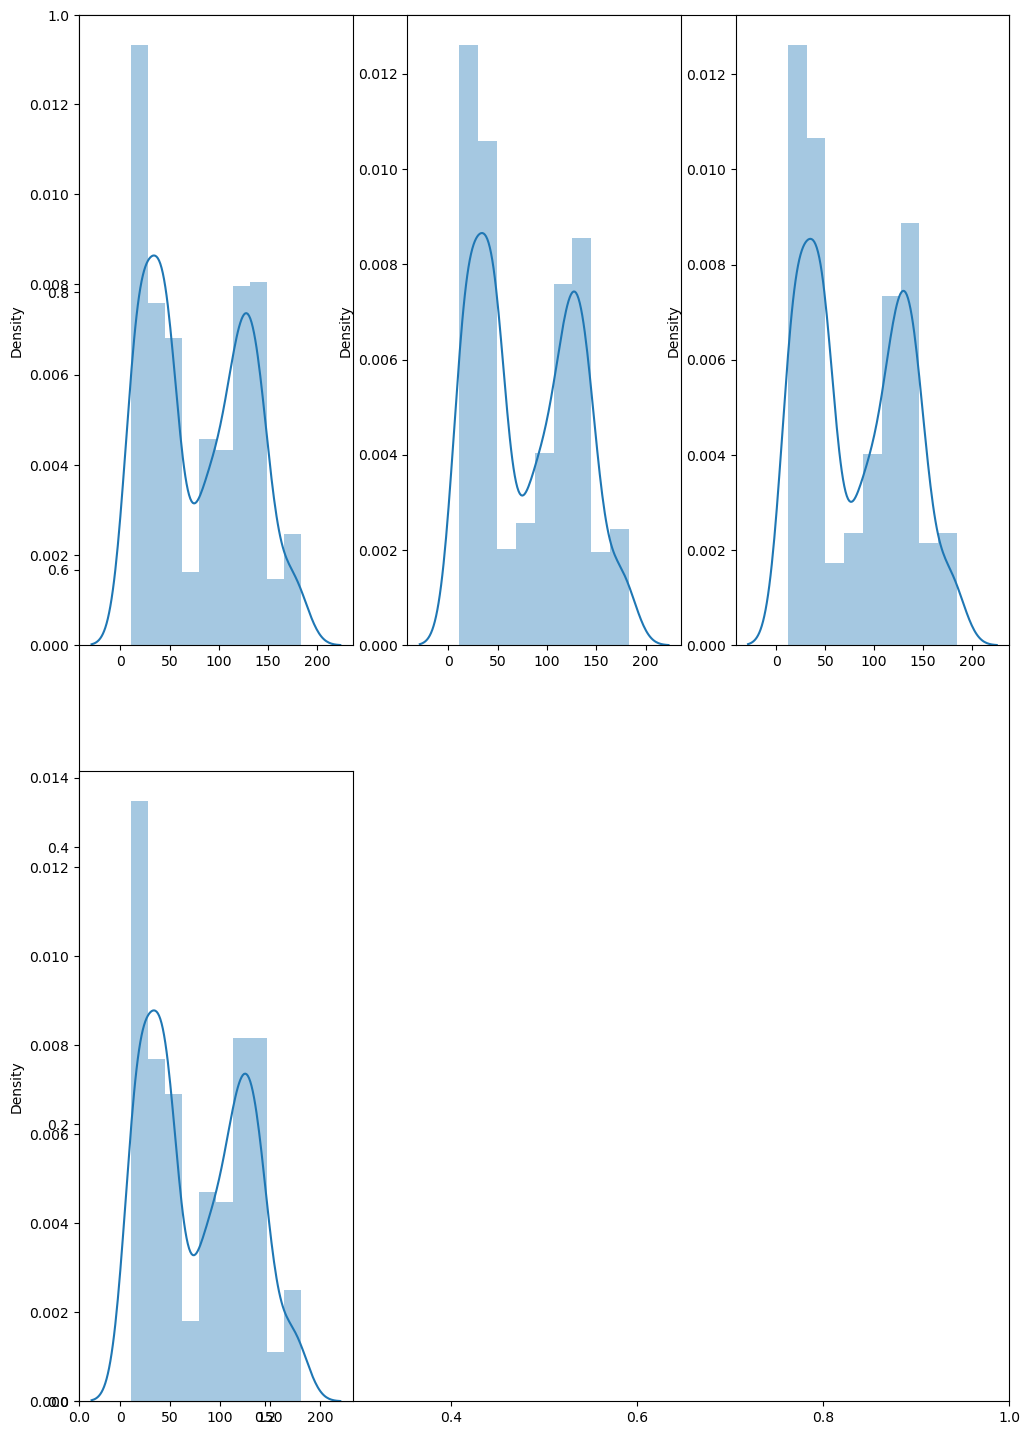

In [6]:
features = ["Open", "Close", "High", "Low"]
plt.subplots(figsize=(12,18))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()

In [7]:
horizons = [2,5,60,250, 1000]
new_predictions= []

for horizon in horizons: 
    rolling_average = df.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df['Close'] / rolling_average["Close"]

df

Price,Close,High,Low,Open,Volume,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,,,,,
Date,,,,,,,,,,
2022-08-29,15.778239,16.314465,15.744289,15.996925,496132000,NaN,NaN,NaN,NaN,NaN
2022-08-30,15.445721,16.015897,15.160132,15.937012,530181000,0.989351,NaN,NaN,NaN,NaN
2022-08-31,15.072259,15.517617,14.937453,15.361841,573710000,0.987763,NaN,NaN,NaN,NaN
2022-09-01,13.916924,14.359286,13.250885,14.188532,1178865000,0.960146,NaN,NaN,NaN,NaN
2022-09-02,13.627342,14.150587,13.571422,14.079690,743157000,0.989487,0.922755,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-08-21,174.979996,176.899994,173.809998,174.850006,140040900,0.998801,0.984715,1.080955,1.294796,NaN
2025-08-22,177.990005,178.589996,171.199997,172.610001,172789400,1.008528,1.004436,1.094682,1.314957,NaN


In [8]:
df["HL_PCT"] = (df["High"] - df["Low"]) / df["Low"] * 100
df["PCT_Change"] = (df["Close"] - df["Open"]) / df["Open"] * 100

In [9]:
df = df[["Close", "HL_PCT", "PCT_Change", "Volume", "Close_Ratio_2", "Close_Ratio_5", "Close_Ratio_60", "Close_Ratio_250"]]

In [10]:
df
df.dropna(inplace = True)
df

/var/folders/8t/02rqhjs137jgdrdtzbwlhwn40000gn/T/ipykernel_43323/960342318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


Price,Close,HL_PCT,PCT_Change,Volume,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250
Ticker,NVDA,,,NVDA,,,,
Date,,,,,,,,
2023-08-25,45.989697,6.176711,-2.114353,925341000,0.987712,0.987799,1.061465,1.800965
2023-08-28,46.806194,4.660486,0.759435,685192000,1.008799,1.005906,1.077382,1.824073
2023-08-29,48.753994,5.798544,4.538636,701397000,1.020383,1.033927,1.118160,1.890167
2023-08-30,49.233704,3.101701,0.448579,735206000,1.004896,1.034680,1.124824,1.898706
2023-08-31,49.324650,1.605456,-0.050631,528570000,1.000923,1.027134,1.122330,1.891880
...,...,...,...,...,...,...,...,...
2025-08-21,174.979996,1.777801,0.074344,140040900,0.998801,0.984715,1.080955,1.294796
2025-08-22,177.990005,4.316589,3.116856,172789400,1.008528,1.004436,1.094682,1.314957


In [11]:
import math
forecast_col = "Close"
forecast_out = int(math.ceil(0.01 * len(df)))
df["Label"] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace = True) 
forecast_out

/var/folders/8t/02rqhjs137jgdrdtzbwlhwn40000gn/T/ipykernel_43323/965855337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Label"] = df[forecast_col].shift(-forecast_out)
/var/folders/8t/02rqhjs137jgdrdtzbwlhwn40000gn/T/ipykernel_43323/965855337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


6

In [12]:
df

Price,Close,HL_PCT,PCT_Change,Volume,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Label
Ticker,NVDA,,,NVDA,,,,,
Date,,,,,,,,,
2023-08-25,45.989697,6.176711,-2.114353,925341000,0.987712,0.987799,1.061465,1.800965,48.518143
2023-08-28,46.806194,4.660486,0.759435,685192000,1.008799,1.005906,1.077382,1.824073,47.035931
2023-08-29,48.753994,5.798544,4.538636,701397000,1.020383,1.033927,1.118160,1.890167,46.216370
2023-08-30,49.233704,3.101701,0.448579,735206000,1.004896,1.034680,1.124824,1.898706,45.547722
2023-08-31,49.324650,1.605456,-0.050631,528570000,1.000923,1.027134,1.122330,1.891880,45.153934
...,...,...,...,...,...,...,...,...,...
2025-08-13,181.589996,2.575966,-0.564012,179871700,0.995696,0.997440,1.153766,1.356536,174.979996
2025-08-14,182.020004,1.983728,1.262867,129554000,1.001183,0.998431,1.150836,1.357153,177.990005


In [13]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [14]:
df.columns

MultiIndex([(          'Close', 'NVDA'),
            (         'HL_PCT',     ''),
            (     'PCT_Change',     ''),
            (         'Volume', 'NVDA'),
            (  'Close_Ratio_2',     ''),
            (  'Close_Ratio_5',     ''),
            ( 'Close_Ratio_60',     ''),
            ('Close_Ratio_250',     ''),
            (          'Label',     '')],
           names=['Price', 'Ticker'])

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

X = np.array(df.drop(columns = ["Label"]))
y = np.array(df["Label"]) 

X, y = make_regression (n_samples = 200, n_features = 8, noise = 10, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X, y, cv = 5, scoring = "r2")

print(f"R^2 scores for each fold: {scores}")
print(f"Average R^2 score: {np.mean(scores)}")

/var/folders/8t/02rqhjs137jgdrdtzbwlhwn40000gn/T/ipykernel_43323/3942278175.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = np.array(df.drop(columns = ["Label"]))


R^2 scores for each fold: [0.72280724 0.71682479 0.82262717 0.83989898 0.78437008]
Average R^2 score: 0.7773056533140252


In [16]:
# X = np.array(df.drop(columns = ["Label"]))
# y = np.array(df["Label"]) 
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_train.shape[1]

8

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
clf = RandomForestRegressor(n_estimators = 100, random_state = 42, max_depth = None)
clf.fit(X_train, y_train) 
clf.score(X_test, y_test)

0.7221170020023812

In [19]:
clf.score(X_train, y_train) 

0.9700230185720745

In [20]:
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
forecast_set = clf.predict(X_lately)
forecast_set

array([ 11.48561691, 115.75206771, -70.14126053, 166.01783027,
        58.5091218 , -40.95707013])

In [21]:
df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 497 entries, 2023-08-25 to 2025-08-19
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Close, NVDA)        497 non-null    float64
 1   (HL_PCT, )           497 non-null    float64
 2   (PCT_Change, )       497 non-null    float64
 3   (Volume, NVDA)       497 non-null    int64  
 4   (Close_Ratio_2, )    497 non-null    float64
 5   (Close_Ratio_5, )    497 non-null    float64
 6   (Close_Ratio_60, )   497 non-null    float64
 7   (Close_Ratio_250, )  497 non-null    float64
 8   (Label, )            497 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 38.8 KB


In [22]:
df.index = pd.to_datetime(df.index) 
last_date = df.index[-1]
next_date = last_date + pd.Timedelta(days=1) 

In [23]:
X_train.shape[1]

8

In [24]:
df["Forecast"] = np.nan
df.columns
X_train.shape[1]

/var/folders/8t/02rqhjs137jgdrdtzbwlhwn40000gn/T/ipykernel_43323/2812324023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Forecast"] = np.nan


8

In [25]:
last_known = df.iloc[-1]
for prediction in forecast_set: 
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [prediction]
    next_date += pd.Timedelta(days = 1)
    # new_row = last_known.copy()
    # new_row += pd.Timedelta(days=1) 
    # df.loc[next_date] = new_row

df.tail(10)

/var/folders/8t/02rqhjs137jgdrdtzbwlhwn40000gn/T/ipykernel_43323/2475366408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [prediction]
/var/folders/8t/02rqhjs137jgdrdtzbwlhwn40000gn/T/ipykernel_43323/2475366408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [prediction]
/var/folders/8t/02rqhjs137jgdrdtzbwlhwn40000gn/T/ipykernel_43323/2475366408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

Price,Close,HL_PCT,PCT_Change,Volume,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Label,Forecast
Ticker,NVDA,,,NVDA,,,,,,
Date,,,,,,,,,,
2025-08-14,182.020004,1.983728,1.262867,129554000.0,1.001183,0.998431,1.150836,1.357153,177.990005,NaN
2025-08-15,180.449997,2.168053,-0.786237,156602200.0,0.995669,0.992269,1.135396,1.343139,179.809998,NaN
2025-08-18,182.009995,1.301294,0.780724,132008000.0,1.004304,1.000902,1.139213,1.352436,181.770004,NaN
2025-08-19,175.639999,3.994526,-3.721972,185229200.0,0.982189,0.973927,1.094454,1.303334,181.600006,NaN
2025-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.485617
2025-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115.752068
2025-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-70.141261
2025-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166.017830


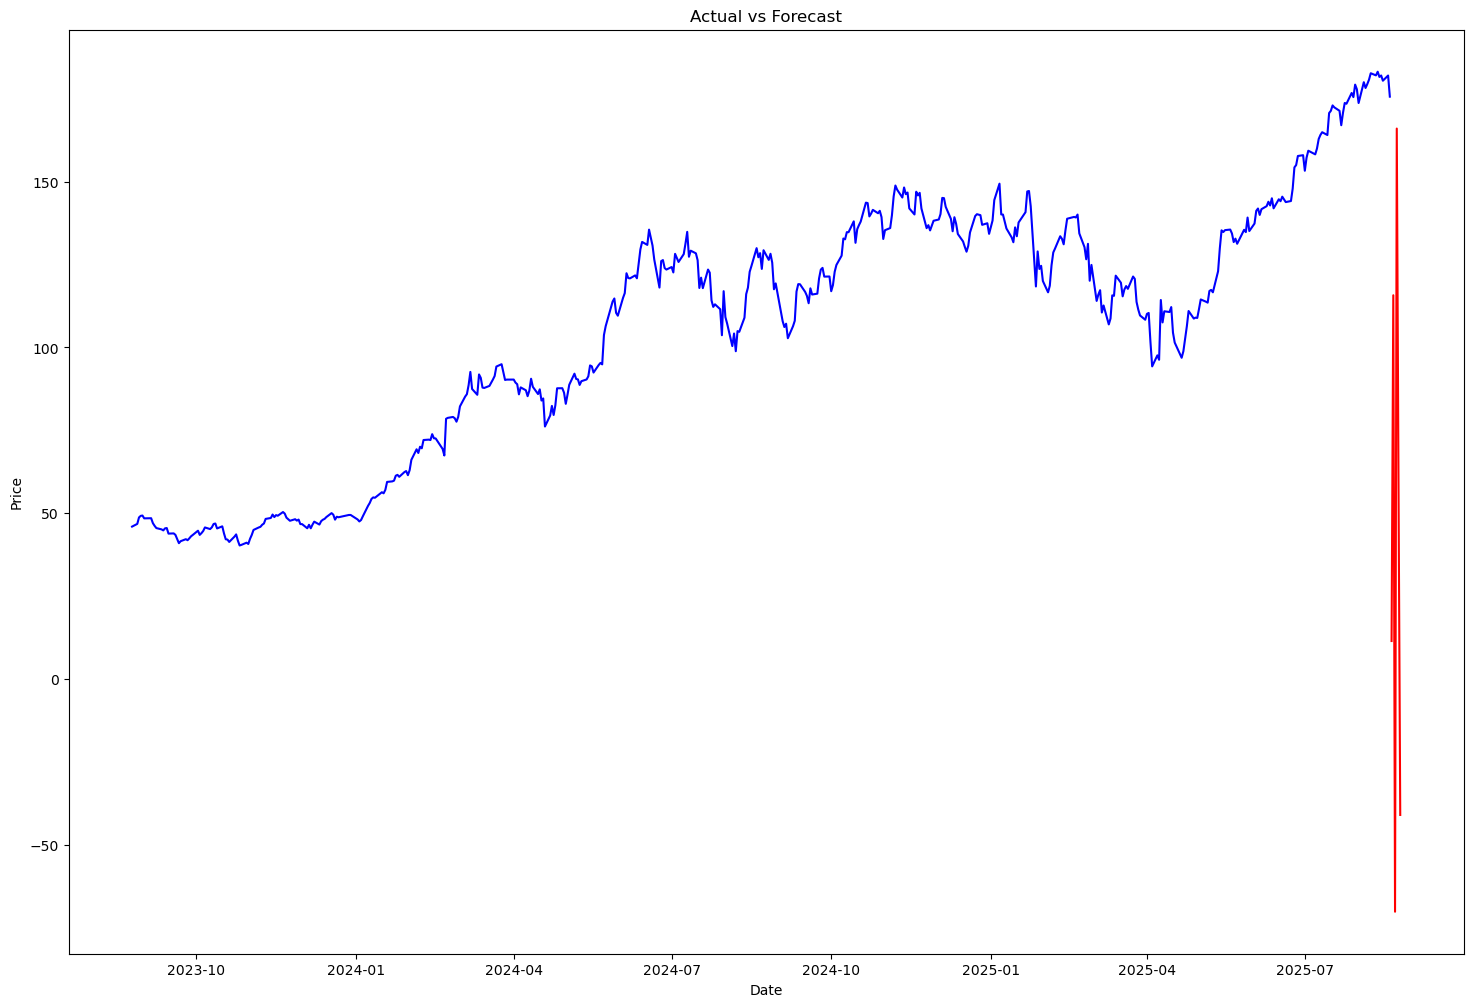

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
plt.plot(df.index, df["Close"], label = "Close Price", color = "blue")
plt.plot(df.index, df["Forecast"], label = "Forecast Price", color = "red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Actual vs Forecast")
plt.show()

In [27]:
# forecast_set = forecast_set.flatten()
# actual_price = actual_price.flatten()

# actual_price = df["Close"][-forecast_out:].values
# for pred, actual in zip(forecast_set, actual_price): 
#     print(f"Predicted: {pred}, Actual: {actual}, Error: {pred - actual}")

In [28]:
df_1 = yf.download(ticker, start = dt.date(2025, 8,21), end  = dt.date(2025, 8,29))

/var/folders/8t/02rqhjs137jgdrdtzbwlhwn40000gn/T/ipykernel_43323/2505537018.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_1 = yf.download(ticker, start = dt.date(2025, 8,21), end  = dt.date(2025, 8,29))
[*********************100%***********************]  1 of 1 completed


In [29]:
df_1

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-08-21,174.979996,176.899994,173.809998,174.850006,140040900
2025-08-22,177.990005,178.589996,171.199997,172.610001,172789400
2025-08-25,179.809998,181.910004,176.570007,178.350006,163012800
2025-08-26,181.770004,182.389999,178.809998,180.059998,168688200
2025-08-27,181.600006,182.490005,179.100006,181.979996,235518900
2025-08-28,180.169998,184.470001,176.410004,180.820007,281787800


In [30]:
actual_prices = df_1["Close"].to_numpy().flatten()
predicted_prices = df["Forecast"][-forecast_out:].to_numpy().flatten()
accuracy = (predicted_prices - actual_prices) / actual_prices * 100

In [31]:
accuracy

array([ -93.43604001,  -34.96709695, -139.00854317,   -8.66599199,
        -67.78132168, -122.73245854])

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
r2_score = r2_score(actual_prices, predicted_prices)
mae
mse
r2_score

-4805.645119503552

In [33]:
mae

139.2756168832078

In [34]:
mse

26229.380223896238

In [35]:
r2_score

-4805.645119503552

In [36]:
df.columns

MultiIndex([(          'Close', 'NVDA'),
            (         'HL_PCT',     ''),
            (     'PCT_Change',     ''),
            (         'Volume', 'NVDA'),
            (  'Close_Ratio_2',     ''),
            (  'Close_Ratio_5',     ''),
            ( 'Close_Ratio_60',     ''),
            ('Close_Ratio_250',     ''),
            (          'Label',     ''),
            (       'Forecast',     '')],
           names=['Price', 'Ticker'])

In [37]:
X_train.shape[1]

8

In [38]:
drop_features = ["Label", "Forecast"]
feature_names = df.drop(columns=drop_features).columns.tolist()
X_train = pd.DataFrame(X_train, columns =feature_names)
print(X_train.columns)

Index([      ('Close', 'NVDA'),          ('HL_PCT', ''),
            ('PCT_Change', ''),      ('Volume', 'NVDA'),
         ('Close_Ratio_2', ''),   ('Close_Ratio_5', ''),
        ('Close_Ratio_60', ''), ('Close_Ratio_250', '')],
      dtype='object')


/var/folders/8t/02rqhjs137jgdrdtzbwlhwn40000gn/T/ipykernel_43323/383818727.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  feature_names = df.drop(columns=drop_features).columns.tolist()


In [39]:
from sklearn.feature_selection import RFE

X_train = pd.DataFrame(X_train) 
y_train = pd.DataFrame(y_train)

model = RandomForestRegressor()
rfe = RFE(estimator=model, n_features_to_select = (7)) 
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]

selected_features

/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Index([      ('Close', 'NVDA'),          ('HL_PCT', ''),
            ('Volume', 'NVDA'),   ('Close_Ratio_2', ''),
         ('Close_Ratio_5', ''),  ('Close_Ratio_60', ''),
       ('Close_Ratio_250', '')],
      dtype='object')